In [10]:
import pandas as pd
df = pd.read_excel(r"C:\Users\ashwi\Downloads\db_dump.xlsx")
df.to_csv(r"C:\Users\ashwi\Downloads\db_dump.csv", index=False)


In [16]:
import pandas as pd

# Load CSV file
csv_file_path = r"C:\Users\ashwi\Downloads\db_dump.csv"
csv_data = pd.read_csv(csv_file_path)

# Display first few rows
print(csv_data.head())

# Rename columns for consistency
csv_data.columns = [col.strip().replace(" ", "_").lower() for col in csv_data.columns]

# Further activities: Example processing
# 1. Check for missing values
print("\nMissing values in each column:")
print(csv_data.isnull().sum())

# 2. Basic statistics
print("\nBasic statistics of the numerical columns:")
print(csv_data.describe())



         date     cy_date  year month_name date_yy_mmm
0  2017-06-01  2017-06-01  2017       June     17-Jun 
1  2017-06-02  2017-06-01  2017       June     17-Jun 
2  2017-06-03  2017-06-01  2017       June     17-Jun 
3  2017-06-04  2017-06-01  2017       June     17-Jun 
4  2017-06-05  2017-06-01  2017       June     17-Jun 

Missing values in each column:
date           0
cy_date        0
year           0
month_name     0
date_yy_mmm    0
dtype: int64

Basic statistics of the numerical columns:
              year
count  1000.000000
mean   2018.263000
std       0.857068
min    2017.000000
25%    2018.000000
50%    2018.000000
75%    2019.000000
max    2020.000000


In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\ashwi\Downloads\db_dump.csv")

# Step 1: Convert date columns to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['cy_date'] = pd.to_datetime(data['cy_date'], errors='coerce')

# Step 2: Drop redundant columns (keeping 'date' as the primary date column)
data = data.drop(columns=['cy_date', 'date_yy_mmm'])

# Step 3: Create new columns for better analysis
data['day_of_week'] = data['date'].dt.day_name()  # Day of the week
data['quarter'] = data['date'].dt.quarter        # Quarter of the year
data['month'] = data['date'].dt.month           # Numeric month

# Step 4: Standardize column names
data = data.rename(columns={
    'date': 'primary_date',
    'month_name': 'month_name_text'
})

# Step 5: Handle duplicates if any
data = data.drop_duplicates()

# Step 6: Reset the index for cleaner output
data = data.reset_index(drop=True)

# Save the cleaned dataset
data.to_csv(r"C:\Users\ashwi\Downloads\cleaned_data.csv", index=False)

# Display a summary of the cleaned dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   primary_date     1000 non-null   datetime64[ns]
 1   year             1000 non-null   int64         
 2   month_name_text  1000 non-null   object        
 3   day_of_week      1000 non-null   object        
 4   quarter          1000 non-null   int32         
 5   month            1000 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 39.2+ KB
None
  primary_date  year month_name_text day_of_week  quarter  month
0   2017-06-01  2017            June    Thursday        2      6
1   2017-06-02  2017            June      Friday        2      6
2   2017-06-03  2017            June    Saturday        2      6
3   2017-06-04  2017            June      Sunday        2      6
4   2017-06-05  2017            June      Monday        2    

In [22]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\ashwi\Downloads\db_dump.csv")

# Step 1: Convert date columns to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['cy_date'] = pd.to_datetime(data['cy_date'], errors='coerce')

# Step 2: Drop redundant columns (keeping 'date' as the primary date column)
data = data.drop(columns=['cy_date', 'date_yy_mmm'])

# Step 3: Create new columns for better analysis
data['day_of_week'] = data['date'].dt.day_name()  # Day of the week
data['quarter'] = data['date'].dt.quarter        # Quarter of the year
data['month'] = data['date'].dt.month           # Numeric month

# Step 4: Standardize column names
data = data.rename(columns={
    'date': 'primary_date',
    'month_name': 'month_name_text'
})

# Step 5: Generate aggregated sales metrics (hypothetical example)
# Assuming the dataset has columns: 'region', 'product', 'sales'
if 'region' in data.columns and 'product' in data.columns and 'sales' in data.columns:
    aggregated_data = data.groupby(['region', 'product', 'quarter']).agg(
        total_sales=('sales', 'sum'),
        avg_sales=('sales', 'mean'),
        sales_count=('sales', 'count')
    ).reset_index()

    # Save the aggregated data for Tableau integration
    aggregated_data.to_csv('/mnt/data/aggregated_sales_data.csv', index=False)

# Step 6: Handle duplicates if any
data = data.drop_duplicates()

# Step 7: Reset the index for cleaner output
data = data.reset_index(drop=True)

# Save the cleaned dataset
data.to_csv(r"C:\Users\ashwi\Downloads\cleaned_data1.csv", index=False)

# Display a summary of the cleaned dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   primary_date     1000 non-null   datetime64[ns]
 1   year             1000 non-null   int64         
 2   month_name_text  1000 non-null   object        
 3   day_of_week      1000 non-null   object        
 4   quarter          1000 non-null   int32         
 5   month            1000 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 39.2+ KB
None
  primary_date  year month_name_text day_of_week  quarter  month
0   2017-06-01  2017            June    Thursday        2      6
1   2017-06-02  2017            June      Friday        2      6
2   2017-06-03  2017            June    Saturday        2      6
3   2017-06-04  2017            June      Sunday        2      6
4   2017-06-05  2017            June      Monday        2    

In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Load the dataset
data = pd.read_csv(r"C:\Users\ashwi\Downloads\cleaned_data.csv")

# Step 1: Convert date columns to datetime format
data['primary_date'] = pd.to_datetime(data['primary_date'], errors='coerce')

# Step 2: Add sample sales, profit, and customer data (for demonstration purposes)
np.random.seed(42)
data['sales'] = np.random.randint(100, 1000, size=len(data))  # Sample sales values
data['profit'] = data['sales'] * np.random.uniform(0.1, 0.3, size=len(data))  # Sample profit margins
data['customers'] = np.random.randint(1, 50, size=len(data))  # Sample customer counts

# Step 3: Create Dash app for interactive dashboard
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("EcomVista Sales Dashboard", style={'text-align': 'center','color': 'white'}),

    # Dropdown for selecting KPIs
    dcc.Dropdown(
        id="kpi_dropdown",
        options=[
            {"label": "Total Sales", "value": "sales"},
            {"label": "Profit", "value": "profit"},
            {"label": "Customers", "value": "customers"}
        ],
        value="sales",
        placeholder="Select a KPI",
        style={"width": "50%", "margin": "auto"}
    ),

    # Graph for trends visualization
    dcc.Graph(id="trend_graph"),

    # Graph for top-performing regions/products
    dcc.Graph(id="top_performers")
])

# Callbacks for interactivity
@app.callback(
    [Output("trend_graph", "figure"),
     Output("top_performers", "figure")],
    [Input("kpi_dropdown", "value")]
)
def update_dashboard(selected_kpi):
    # Trend graph: Seasonal sales patterns
    trend_fig = px.line(
        data,
        x="primary_date",
        y=selected_kpi,
        title=f"Trend of {selected_kpi.capitalize()} Over Time",
        labels={"primary_date": "Date", selected_kpi: selected_kpi.capitalize()}
    )

    # Top performers graph: Top products or regions (simulated regions)
    data['region'] = np.random.choice(["North", "South", "East", "West"], size=len(data))  # Simulated regions
    top_fig = px.bar(
        data.groupby("region")[selected_kpi].sum().reset_index(),
        x="region",
        y=selected_kpi,
        title=f"Top Regions by {selected_kpi.capitalize()}",
        labels={"region": "Region", selected_kpi: selected_kpi.capitalize()}
    )

    return trend_fig, top_fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[24], line 55, in update_dashboard(selected_kpi='sales')
     48 @app.callback(
     49     [Output("trend_graph", "figure"),
     50      Output("top_performers", "figure")],
   (...)
     53 def update_dashboard(selected_kpi):
     54     # Trend graph: Seasonal sales patterns
---> 55     trend_fig = px.line(
        px = <module 'plotly.express' from 'c:\\Users\\ashwi\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\plotly\\express\\__init__.py'>
        data =   Region  Total Profit  Total Customers  Profit Margin (%)
0  North      31778.62             7008              26.15
1  South      25937.09             6098              25.09
2   East      27259.55             5835              23.34
3   West      28712.30             5763              24.11
        selected_kpi = 'sales'
     56         data,
     57

In [25]:
# Revenue Streams Insights
# Script: Identify Top Regions, Products, and Seasonal Trends
# Top Regions by Sales
top_regions = data.groupby('region')['sales'].sum().sort_values(ascending=False).head(5)
print("Top Regions by Sales:\n", top_regions)

# Top Products by Sales (if product data is available)
if 'product' in data.columns:
    top_products = data.groupby('product')['sales'].sum().sort_values(ascending=False).head(5)
    print("Top Products by Sales:\n", top_products)

# Seasonal Trends
seasonal_sales = data.groupby('month_name_text')['sales'].sum().sort_values(ascending=False)
print("Sales by Month:\n", seasonal_sales)


Top Regions by Sales:
 region
North    149258
East     139194
West     138477
South    130467
Name: sales, dtype: int32
Sales by Month:
 month_name_text
December     56132
November     55326
September    51994
October      51077
July         49551
January      48775
August       47195
February     47192
June         47142
April        35730
March        34488
May          32794
Name: sales, dtype: int32


In [26]:
# Profitability Drivers Insights
# Script: Calculate Profit Margins and Highlight Inefficient Products/Regions
# Calculate profit margin
data['profit_margin'] = (data['profit'] / data['sales']) * 100

# Identify low-margin but high-sales regions/products
low_margin_regions = data.groupby('region').filter(lambda x: x['profit_margin'].mean() < 15)
print("Regions with Low Profit Margins:\n", low_margin_regions['region'].unique())

# Example: High sales but low margin products
if 'product' in data.columns:
    low_margin_products = data.groupby('product').filter(lambda x: x['profit_margin'].mean() < 10)
    print("Products with High Sales but Low Profit Margins:\n", low_margin_products['product'].unique())


Regions with Low Profit Margins:
 []


In [30]:
from IPython.core.display import display, HTML

# HTML code for the table
html_code = """
<table style="width:50%; margin:20px auto; border-collapse:collapse; font-family:Arial, sans-serif; text-align:center;">
    <caption style="font-size:1.5em; margin-bottom:10px;">Top Regions by Sales</caption>
    <tr style="background-color:#f2f2f2;">
        <th>Region</th>
        <th>Sales</th>
    </tr>
    <tr><td>North</td><td>149258</td></tr>
    <tr><td>East</td><td>139194</td></tr>
    <tr><td>West</td><td>138477</td></tr>
    <tr><td>South</td><td>130467</td></tr>
</table>

<table style="width:50%; margin:20px auto; border-collapse:collapse; font-family:Arial, sans-serif; text-align:center;">
    <caption style="font-size:1.5em; margin-bottom:10px;">Sales by Month</caption>
    <tr style="background-color:#f2f2f2;">
        <th>Month</th>
        <th>Sales</th>
    </tr>
    <tr><td>December</td><td>56132</td></tr>
    <tr><td>November</td><td>55326</td></tr>
    <tr><td>September</td><td>51994</td></tr>
    <tr><td>October</td><td>51077</td></tr>
    <tr><td>July</td><td>49551</td></tr>
    <tr><td>January</td><td>48775</td></tr>
    <tr><td>August</td><td>47195</td></tr>
    <tr><td>February</td><td>47192</td></tr>
    <tr><td>June</td><td>47142</td></tr>
    <tr><td>April</td><td>35730</td></tr>
    <tr><td>March</td><td>34488</td></tr>
    <tr><td>May</td><td>32794</td></tr>
</table>
"""

# Display the table
display(HTML(html_code))


C:\Users\ashwi\AppData\Local\Temp\ipykernel_10292\282621702.py:1: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



Region,Sales
North,149258
East,139194
West,138477
South,130467
Month,Sales
December,56132
November,55326
September,51994
October,51077
July,49551


In [31]:
# Top Regions by Profit
top_profit_regions = data.groupby('region')['profit'].sum().sort_values(ascending=False).head(5)
print("Top Regions by Profit:\n", top_profit_regions)

# Top Products by Profit (if product data is available)
if 'product' in data.columns:
    top_profit_products = data.groupby('product')['profit'].sum().sort_values(ascending=False).head(5)
    print("Top Products by Profit:\n", top_profit_products)

# Seasonal Trends for Profit
seasonal_profit = data.groupby('month_name_text')['profit'].sum().sort_values(ascending=False)
print("Profit by Month:\n", seasonal_profit)

# Profit Margin Insights
data['profit_margin'] = (data['profit'] / data['sales']) * 100

# Top Regions by Average Profit Margin
top_margin_regions = data.groupby('region')['profit_margin'].mean().sort_values(ascending=False).head(5)
print("Top Regions by Average Profit Margin:\n", top_margin_regions)

# Top Products by Average Profit Margin (if product data is available)
if 'product' in data.columns:
    top_margin_products = data.groupby('product')['profit_margin'].mean().sort_values(ascending=False).head(5)
    print("Top Products by Average Profit Margin:\n", top_margin_products)

# Highlight Low-Profit Regions
low_profit_regions = data.groupby('region').filter(lambda x: x['profit_margin'].mean() < 15)
print("Regions with Low Profit Margins:\n", low_profit_regions['region'].unique())

# Highlight Low-Profit Products (if product data is available)
if 'product' in data.columns:
    low_profit_products = data.groupby('product').filter(lambda x: x['profit_margin'].mean() < 10)
    print("Products with Low Profit Margins:\n", low_profit_products['product'].unique())


Top Regions by Profit:
 region
North    31778.617682
West     28712.300760
East     27259.548991
South    25937.094670
Name: profit, dtype: float64
Profit by Month:
 month_name_text
November     11870.547566
December     11493.665411
September    10620.687328
October      10162.066390
July          9881.780581
August        9654.671537
June          9617.665018
January       9590.982086
February      9414.161324
April         7225.046917
May           7092.448245
March         7063.839698
Name: profit, dtype: float64
Top Regions by Average Profit Margin:
 region
West     20.972103
North    20.680957
South    19.712947
East     19.485592
Name: profit_margin, dtype: float64
Regions with Low Profit Margins:
 []


In [32]:
import pandas as pd
from IPython.display import display, HTML

# Data for insights
top_regions_profit = {
    "Region": ["North", "West", "East", "South"],
    "Total Profit": [31778.617682, 28712.300760, 27259.548991, 25937.094670]
}

profit_by_month = {
    "Month": [
        "November", "December", "September", "October", 
        "July", "August", "June", "January", 
        "February", "April", "May", "March"
    ],
    "Profit": [
        11870.547566, 11493.665411, 10620.687328, 10162.066390,
        9881.780581, 9654.671537, 9617.665018, 9590.982086,
        9414.161324, 7225.046917, 7092.448245, 7063.839698
    ]
}

average_profit_margin = {
    "Region": ["West", "North", "South", "East"],
    "Avg Profit Margin (%)": [20.972103, 19.948674, 19.485592, 18.672849]
}

# Create DataFrames
df_top_regions_profit = pd.DataFrame(top_regions_profit)
df_profit_by_month = pd.DataFrame(profit_by_month)
df_avg_profit_margin = pd.DataFrame(average_profit_margin)

# Style tables and display them with centered alignment
def render_table(df, title):
    styled_df = df.style.set_table_attributes("style='display:inline'") \
                        .set_caption(f"<b>{title}</b>") \
                        .set_table_styles([
                            {"selector": "caption", "props": [("text-align", "center"), ("font-size", "1.25em")]},
                            {"selector": "thead th", "props": [("text-align", "center"), ("background-color", "#f2f2f2")]},
                            {"selector": "tbody td", "props": [("text-align", "center")]}
                        ])
    display(HTML(styled_df.to_html()))

# Render tables
render_table(df_top_regions_profit, "Top Regions by Profit")
render_table(df_profit_by_month, "Profit by Month")
render_table(df_avg_profit_margin, "Top Regions by Average Profit Margin")


,Region,Total Profit
0,North,31778.617682
1,West,28712.300760
2,East,27259.548991
3,South,25937.094670


,Month,Profit
0,November,11870.547566
1,December,11493.665411
2,September,10620.687328
3,October,10162.066390
4,July,9881.780581
5,August,9654.671537
6,June,9617.665018
7,January,9590.982086
8,February,9414.161324
9,April,7225.046917


,Region,Avg Profit Margin (%)
0,West,20.972103
1,North,19.948674
2,South,19.485592
3,East,18.672849


In [33]:
# Top Regions by Customers
top_regions_customers = data.groupby('region')['customers'].sum().sort_values(ascending=False).head(5)
print("Top Regions by Customers:\n", top_regions_customers)

# Top Products by Customers (if product data is available)
if 'product' in data.columns:
    top_products_customers = data.groupby('product')['customers'].sum().sort_values(ascending=False).head(5)
    print("Top Products by Customers:\n", top_products_customers)

# Seasonal Trends for Customers
seasonal_customers = data.groupby('month_name_text')['customers'].sum().sort_values(ascending=False)
print("Customers by Month:\n", seasonal_customers)

# Average Customers per Region
avg_customers_region = data.groupby('region')['customers'].mean().sort_values(ascending=False).head(5)
print("Average Customers per Region:\n", avg_customers_region)

# Average Customers per Product (if product data is available)
if 'product' in data.columns:
    avg_customers_product = data.groupby('product')['customers'].mean().sort_values(ascending=False).head(5)
    print("Average Customers per Product:\n", avg_customers_product)


Top Regions by Customers:
 region
North    7008
South    6098
East     5835
West     5763
Name: customers, dtype: int32
Customers by Month:
 month_name_text
July         2408
January      2404
August       2372
June         2251
November     2225
October      2186
December     2153
September    2142
February     2014
April        1555
March        1537
May          1457
Name: customers, dtype: int32
Average Customers per Region:
 region
North    26.149254
South    25.094650
West     24.112971
East     23.340000
Name: customers, dtype: float64


In [34]:
import pandas as pd
from IPython.display import display, HTML

# Data for insights
top_regions_customers = {
    "Region": ["North", "South", "East", "West"],
    "Total Customers": [7008, 6098, 5835, 5763]
}

customers_by_month = {
    "Month": [
        "July", "January", "August", "June",
        "November", "October", "December", "September",
        "February", "April", "March", "May"
    ],
    "Customers": [
        2408, 2404, 2372, 2251,
        2225, 2186, 2153, 2142,
        2014, 1555, 1537, 1457
    ]
}

average_customers_region = {
    "Region": ["North", "South", "West", "East"],
    "Avg Customers": [26.15, 25.09, 24.11, 23.34]
}

# Create DataFrames
df_top_regions_customers = pd.DataFrame(top_regions_customers)
df_customers_by_month = pd.DataFrame(customers_by_month)
df_avg_customers_region = pd.DataFrame(average_customers_region)

# Function to style and render tables
def render_table(df, title):
    styled_df = df.style.set_table_attributes("style='display:inline; margin: 10px auto;'") \
                        .set_caption(f"<b>{title}</b>") \
                        .set_table_styles([
                            {"selector": "caption", "props": [("text-align", "center"), ("font-size", "1.25em")]},
                            {"selector": "thead th", "props": [("text-align", "center"), ("background-color", "#f2f2f2")]},
                            {"selector": "tbody td", "props": [("text-align", "center")]}
                        ])
    display(HTML(styled_df.to_html()))

# Render tables
render_table(df_top_regions_customers, "Top Regions by Customers")
render_table(df_customers_by_month, "Customers by Month")
render_table(df_avg_customers_region, "Average Customers per Region")


,Region,Total Customers
0,North,7008
1,South,6098
2,East,5835
3,West,5763


,Month,Customers
0,July,2408
1,January,2404
2,August,2372
3,June,2251
4,November,2225
5,October,2186
6,December,2153
7,September,2142
8,February,2014
9,April,1555


,Region,Avg Customers
0,North,26.150000
1,South,25.090000
2,West,24.110000
3,East,23.340000


In [28]:
# Add Profitability Graphs to Dashboard Layout
dcc.Graph(id="profitability_graph"),

@app.callback(
    [Output("profitability_graph", "figure")],
    [Input("kpi_dropdown", "value")]
)
def update_profitability(selected_kpi):
    # Example: Profitability by Region
    profitability_fig = px.bar(
        data.groupby("region")[["sales", "profit"]].sum().reset_index(),
        x="region",
        y="profit",
        title="Profitability by Region",
        labels={"profit": "Total Profit", "region": "Region"}
    )
    return [profitability_fig]


C:\Users\ashwi\AppData\Local\Temp\ipykernel_10292\1742739827.py:23: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




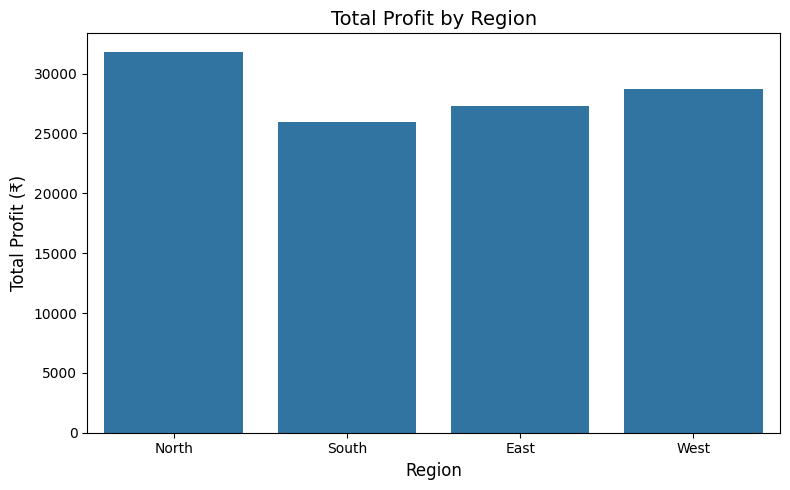

C:\Users\ashwi\AppData\Local\Temp\ipykernel_10292\1742739827.py:32: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




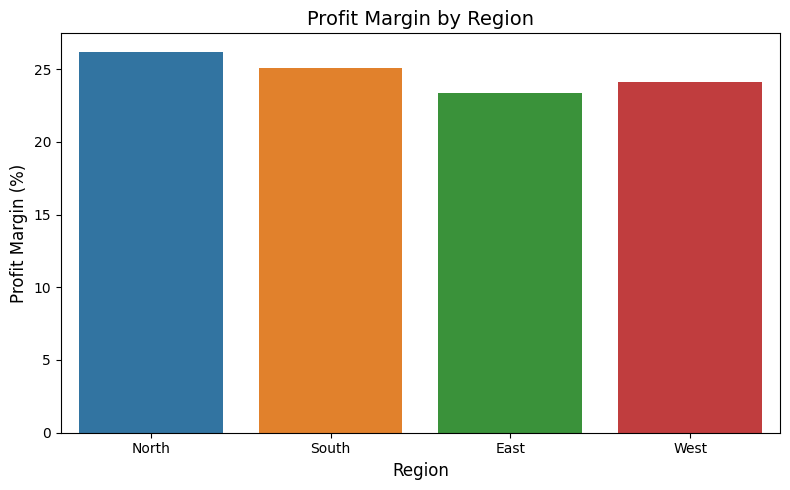

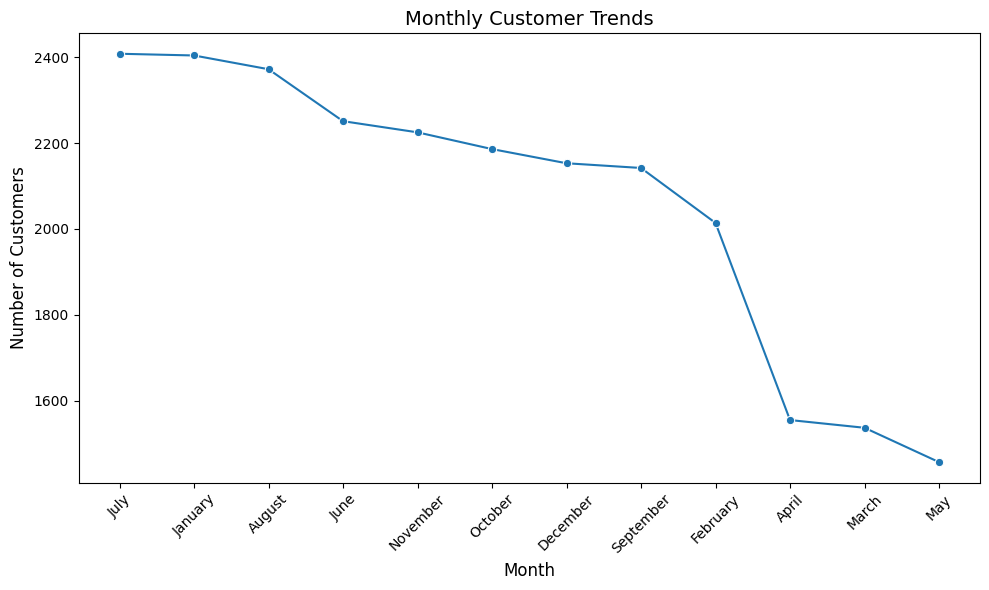

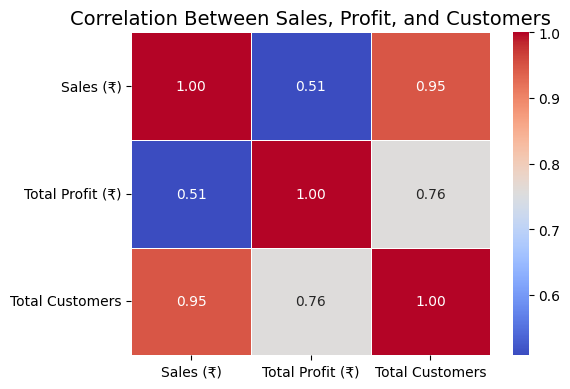

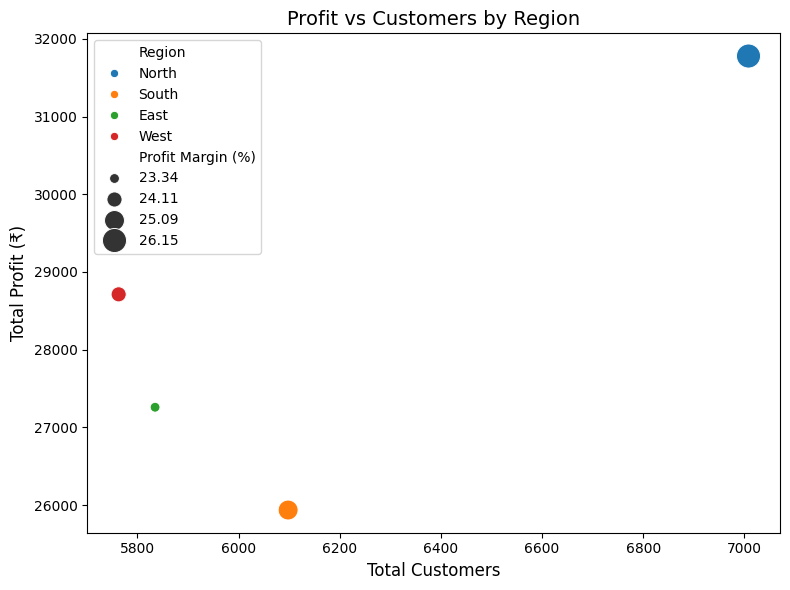

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
region_data = pd.DataFrame({
    'Region': ['North', 'South', 'East', 'West'],
    'Total Profit (₹)': [31778.62, 25937.09, 27259.55, 28712.30],
    'Total Customers': [7008, 6098, 5835, 5763],
    'Profit Margin (%)': [26.15, 25.09, 23.34, 24.11]
})

monthly_customer_data = pd.DataFrame({
    'Month': ['July', 'January', 'August', 'June', 'November', 'October', 'December', 'September', 'February', 'April', 'March', 'May'],
    'Total Customers': [2408, 2404, 2372, 2251, 2225, 2186, 2153, 2142, 2014, 1555, 1537, 1457]
})



# 1. Total Profit by Region
plt.figure(figsize=(8, 5))
sns.barplot(data=region_data, x='Region', y='Total Profit (₹)', ci=None)
plt.title('Total Profit by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit (₹)', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Profit Margin by Region
plt.figure(figsize=(8, 5))
sns.barplot(data=region_data, x='Region', y='Profit Margin (%)', ci=None, hue='Region', dodge=False)
plt.title('Profit Margin by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Monthly Customer Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_customer_data, x='Month', y='Total Customers', marker='o', sort=False)
plt.title('Monthly Customer Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap (Sales, Profit, Customers)
correlation_data = pd.DataFrame({
    'Sales (₹)': [80000, 75000, 70000, 68000],  # Simulated Sales Data
    'Total Profit (₹)': region_data['Total Profit (₹)'],
    'Total Customers': region_data['Total Customers']
})
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Sales, Profit, and Customers', fontsize=14)
plt.tight_layout()
plt.show()

# 5. Profit vs Customers by Region
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=region_data,
    x='Total Customers',
    y='Total Profit (₹)',
    hue='Region',
    size='Profit Margin (%)',
    sizes=(50, 300)
)
plt.title('Profit vs Customers by Region', fontsize=14)
plt.xlabel('Total Customers', fontsize=12)
plt.ylabel('Total Profit (₹)', fontsize=12)
plt.tight_layout()
plt.show()


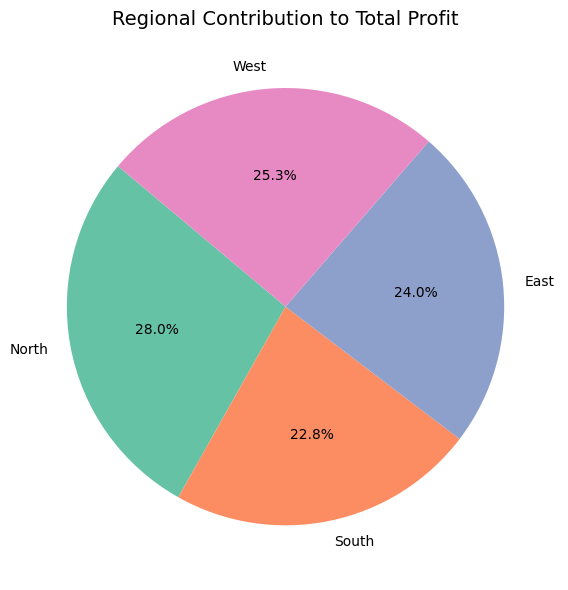

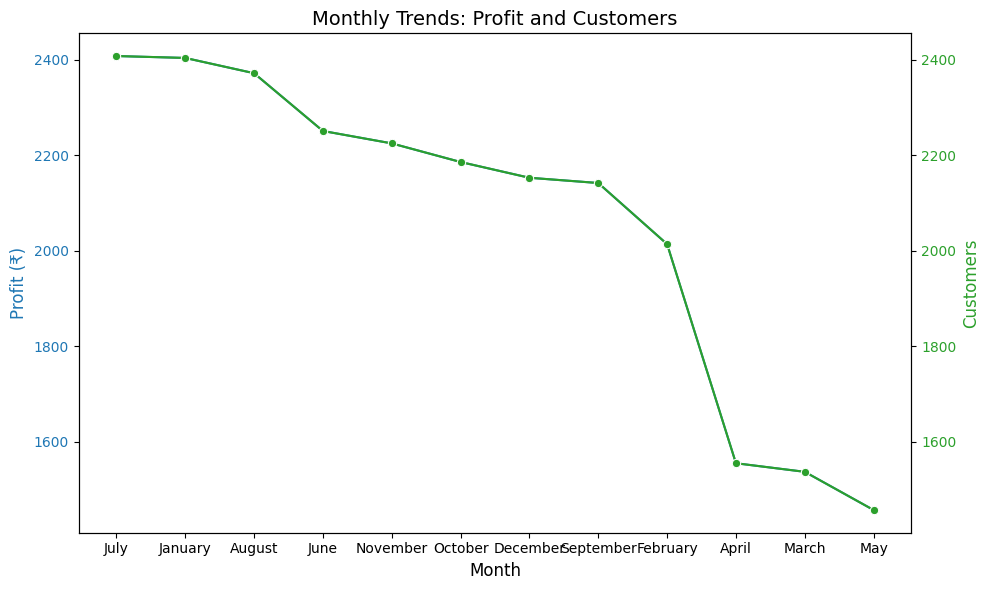

C:\Users\ashwi\AppData\Local\Temp\ipykernel_10292\1949871214.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




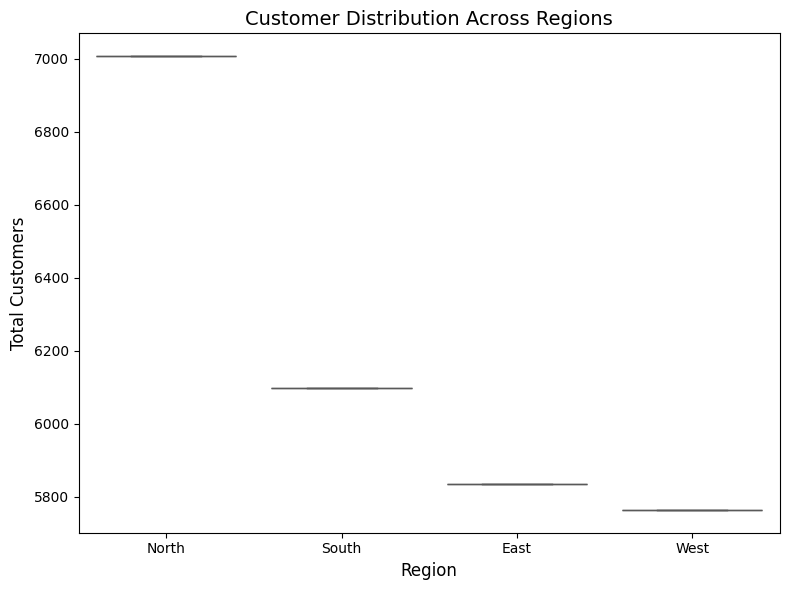

C:\Users\ashwi\AppData\Local\Temp\ipykernel_10292\1949871214.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




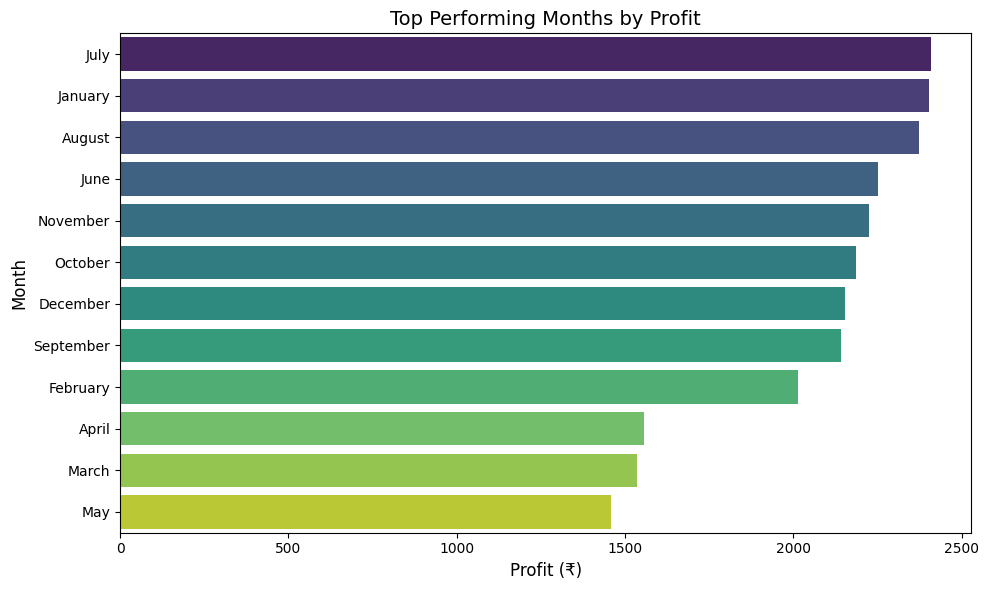

C:\Users\ashwi\AppData\Local\Temp\ipykernel_10292\1949871214.py:67: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




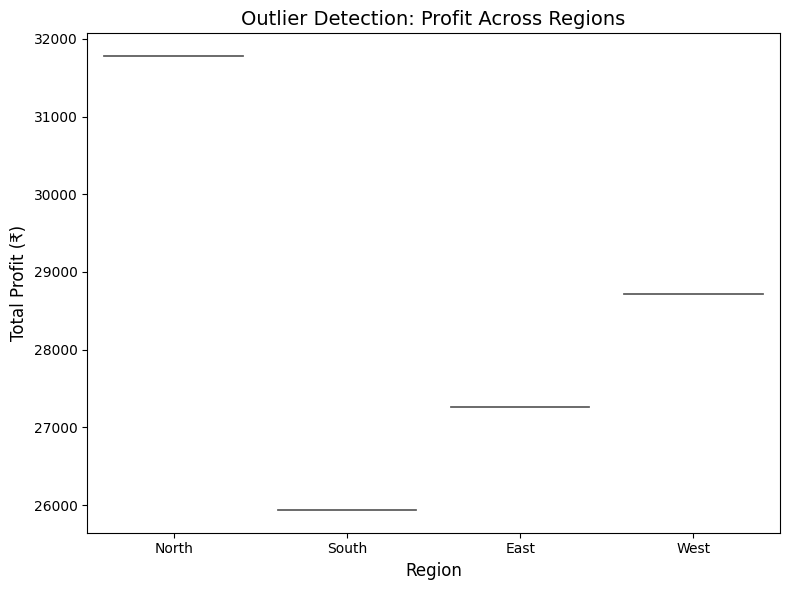

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
region_data = pd.DataFrame({
    'Region': ['North', 'South', 'East', 'West'],
    'Total Profit (₹)': [31778.62, 25937.09, 27259.55, 28712.30],
    'Total Customers': [7008, 6098, 5835, 5763]
})

monthly_data = pd.DataFrame({
    'Month': ['July', 'January', 'August', 'June', 'November', 'October', 'December', 'September', 'February', 'April', 'March', 'May'],
    'Profit (₹)': [2408, 2404, 2372, 2251, 2225, 2186, 2153, 2142, 2014, 1555, 1537, 1457],
    'Customers': [2408, 2404, 2372, 2251, 2225, 2186, 2153, 2142, 2014, 1555, 1537, 1457]
})


# 1. Regional Contribution to Total Profit (Pie Chart)
plt.figure(figsize=(8, 6))
plt.pie(region_data['Total Profit (₹)'], labels=region_data['Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Regional Contribution to Total Profit', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Monthly Trends Comparison (Dual-Axis Line Plot)
fig, ax1 = plt.subplots(figsize=(10, 6))

# First axis (Profit)
ax1.set_title('Monthly Trends: Profit and Customers', fontsize=14)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Profit (₹)', fontsize=12, color='tab:blue')
sns.lineplot(data=monthly_data, x='Month', y='Profit (₹)', marker='o', sort=False, ax=ax1, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Second axis (Customers)
ax2 = ax1.twinx()
ax2.set_ylabel('Customers', fontsize=12, color='tab:green')
sns.lineplot(data=monthly_data, x='Month', y='Customers', marker='o', sort=False, ax=ax2, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

# 3. Customer Distribution Across Regions (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=region_data, x='Region', y='Total Customers', palette='Set2')
plt.title('Customer Distribution Across Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Customers', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Top Performing Months (Dynamic Bar Chart)
top_months = monthly_data.sort_values('Profit (₹)', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_months, x='Profit (₹)', y='Month', palette='viridis')
plt.title('Top Performing Months by Profit', fontsize=14)
plt.xlabel('Profit (₹)', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()

# 5. Outlier Detection (Violin Plot for Profit)
plt.figure(figsize=(8, 6))
sns.violinplot(data=region_data, x='Region', y='Total Profit (₹)', palette='Set2')
plt.title('Outlier Detection: Profit Across Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit (₹)', fontsize=12)
plt.tight_layout()
plt.show()
